In [1]:
!pip install keras


In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=723be24dafb4d341602dbf96f5f672c91978a43b08c92f3a11cb093c076cf0d2
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [3]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# supress warning/error message in terminal
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [5]:
# Load in data from mnist dataset (60K training, 10K testing)
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 11s 1us/step


In [6]:
(x_train, y_train)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [7]:
(x_test,y_test)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [8]:
# reshape & convert to one-hot
x_train=x_train.reshape(x_train.shape[0],784)
x_test=x_test.reshape(x_test.shape[0],784)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10) # 784 & 10 are standard values. You can change them & observe what happens

In [9]:
# Split main training set into train/validation sets (6K out of 60K data points reserved for validation)
x_validate=x_train[:6000,:]
y_validate=y_train[:6000,:]
x_train=x_train[6000:,:]
y_train=y_train[6000:,:]


In [10]:
### Building layers for feedforward NN: Hidden layers have 56,96,96, and 56 nodes in that order # the number of nodes & the folloeing lines of layers can be increased or decreased Takes in 784 values (pixel input) and outputs 10 values (predicted probability for each number, 0-9)* 

In [11]:
model=models.Sequential()
model.add(layers.Dense(56,activation='relu',input_shape=(784,)))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(56,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  # Different optimizers can be used. Search in google

In [13]:
# Training the NN
epochs=5
history=model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print('Finished Fittind')

Epoch 1/5
106/106 - 1s - loss: 3.3037 - accuracy: 0.5894 - val_loss: 0.7258 - val_accuracy: 0.7885 - 1s/epoch - 11ms/step
Epoch 2/5
106/106 - 1s - loss: 0.6032 - accuracy: 0.8224 - val_loss: 0.4809 - val_accuracy: 0.8652 - 530ms/epoch - 5ms/step
Epoch 3/5
106/106 - 0s - loss: 0.4179 - accuracy: 0.8772 - val_loss: 0.3882 - val_accuracy: 0.8928 - 491ms/epoch - 5ms/step
Epoch 4/5
106/106 - 0s - loss: 0.3304 - accuracy: 0.9023 - val_loss: 0.3292 - val_accuracy: 0.9082 - 482ms/epoch - 5ms/step
Epoch 5/5
106/106 - 0s - loss: 0.2749 - accuracy: 0.9180 - val_loss: 0.2974 - val_accuracy: 0.9160 - 496ms/epoch - 5ms/step
Finished Fittind


Checking accuracy on test set...
20/20 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.9154

Accuracy on test set: 0.9154000282287598


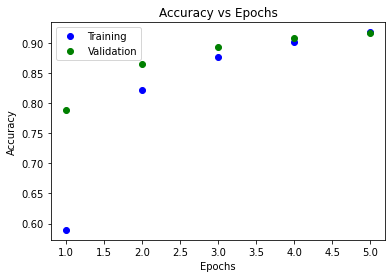

In [14]:
# Plotting learning curves during training
epoch_labels=range(1,epochs+1)
hist_dict=history.history
plt.title("Accuracy vs Epochs")
plt.plot(epoch_labels, hist_dict["accuracy"],'bo', label="Training")
plt.plot(epoch_labels, hist_dict["val_accuracy"],'go', label="Validation")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# evaluating final performance using test data
print("Checking accuracy on test set...")
acc = model.evaluate(x_test,y_test,batch_size=512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()